In [254]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

[ 1  2  3  4  5  6  7  8  9 10]
[9, 24, 25, 49, 67, 70, 76, 78, 78, 78]


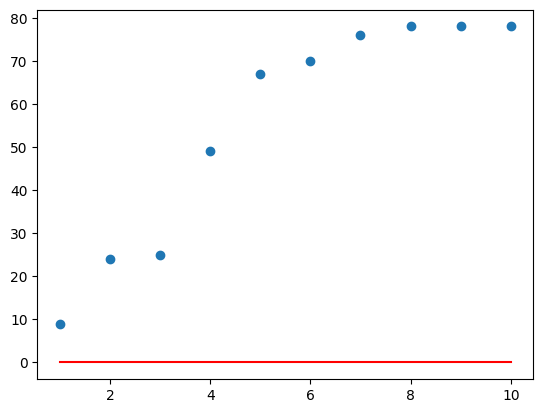

In [255]:
# Modelo 1, aunque sea un  modelo ineficiente lo usamos como punto de partida. Parametros en 0


x = np.array([1, 2, 3, 4, 5, 6, 7, 8, 9, 10])
print(x)
y = sorted(np.random.randint(1,100,10))
print(y)


m = 0
c = 0

plt.scatter(x,y)
plt.plot(x, m*x+c,"r")
plt.show()

## FORMA 1 - GRADIENT DESCENT

In [256]:
# # Para hacer el GIF
#  
# import imageio
# import os
# from IPython.display import clear_output
#  
#  
# # Crear una carpeta para guardar las imágenes
# folder_name = 'images_1'
# if not os.path.exists(folder_name):
#   os.makedirs(folder_name)
# 
# 
# m = 0
# c = 0
# lr = 0.005 # Cambiamos el Learning rate
# 
# imagenes_names = []
# 
# 
# mse =sum((y-(m*x+c))**2)/len(y)
# 
# for i in range(100): # Solo 100 iteraciones
#     clear_output(wait=True)
#     dm = 2/(len(y))*sum((y-(m*x+c))*(-x))
#     dc = 2/(len(y))*sum((y-(m*x+c))*(-1))
#     m = m - dm*lr
#     c = c - dc*lr
#     fig = plt.Figure()
#     
#     plt.scatter(x,y)
#     plt.plot(x, m*x+c,"r")
#     plt.title(f"iter:{i}, error:{round(sum((y-(m*x+c))**2)/len(y), 2)}, m: {round(m,2)}, c:{round(c,3)}")
#     plt.show()
# 
# 
#     if i % 5 == 0:
#         filename = os.path.join(folder_name, f'frame_{i}.png')
#         plt.savefig(filename)
#         imagenes_names.append(filename)
#     plt.close()  # Cerrar la figura actual para liberar memoria
#  
#  
 

In [257]:
# Crear el GIF
# with imageio.get_writer('my_taller.gif', mode='I') as writer:
#     for filename in imagenes_names:
#         image = imageio.imread(filename)
#         writer.append_data(image)

C:\Users\vipre\AppData\Local\Temp\ipykernel_37436\2949899804.py:4: DeprecationWarning: Starting with ImageIO v3 the behavior of this function will switch to that of iio.v3.imread. To keep the current behavior (and make this warning disappear) use `import imageio.v2 as imageio` or call `imageio.v2.imread` directly.
  image = imageio.imread(filename)


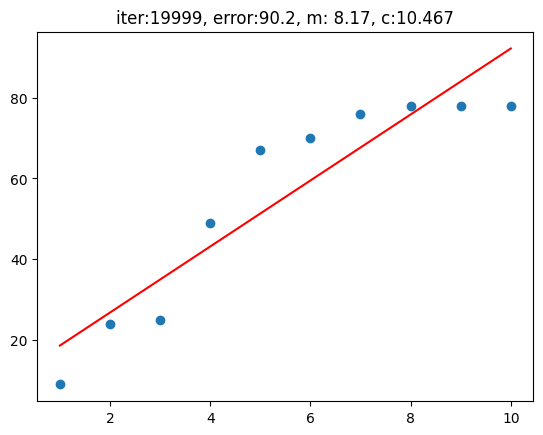

In [258]:
# Vemos que se parece más a los resultados de los otros modelos

from IPython.display import clear_output
m = 0
c = 0
lr = 0.005 # Cambiamos el Learning rate

mse =sum((y-(m*x+c))**2)/len(y)

for i in range(20000): # Para que se nos asimile más a los otros modelos le metemos más iteraciones
    clear_output(wait=True)
    dm = 2/(len(y))*sum((y-(m*x+c))*(-x))
    dc = 2/(len(y))*sum((y-(m*x+c))*(-1))
    m = m - dm*lr
    c = c - dc*lr
    fig = plt.Figure()

# Cuando hacemos muchas iteraciones mejor solo que aparezca el plot

plt.scatter(x,y)
plt.plot(x, m*x+c,"r")
plt.title(f"iter:{i}, error:{round(sum((y-(m*x+c))**2)/len(y), 2)}, m: {round(m,2)}, c:{round(c,3)}")
plt.show()

## FORMA 2 - ECUACION NORMAL

In [259]:
x_1 = np.c_[np.ones(10),x]
x_1

array([[ 1.,  1.],
       [ 1.,  2.],
       [ 1.,  3.],
       [ 1.,  4.],
       [ 1.,  5.],
       [ 1.,  6.],
       [ 1.,  7.],
       [ 1.,  8.],
       [ 1.,  9.],
       [ 1., 10.]])

In [260]:
theta = np.linalg.inv(x_1.T.dot(x_1)).dot(x_1.T).dot(y)
theta

array([10.46666667,  8.16969697])

In [261]:
theta[0]

10.466666666666672

## FORMA 3 - SKLEARN

In [262]:
from sklearn.linear_model import LinearRegression

lm = LinearRegression()
lm.fit(x.reshape(-1,1),y)

LinearRegression()

In [263]:
coeficiente = lm.coef_
coeficiente

array([8.16969697])

In [264]:
intercepto = lm.intercept_
intercepto

10.466666666666654

In [265]:
df = pd.DataFrame({ "Variable": ["m", "c"],
                   "Gradient Descendt": [m, c],
                   "Ecuación Normal": [theta[1], theta[0]],
                   "Skelearn": [coeficiente[0], intercepto]
                   })

df

,Variable,Gradient Descendt,Ecuación Normal,Skelearn
0,m,8.169697,8.169697,8.169697
1,c,10.466667,10.466667,10.466667
